In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import pearsonr
from scipy.stats import spearmanr

sns.set(style='whitegrid', font_scale=1.2)

# Analisi degli eSports Earnings (1998–2023)
### Progetto di Data Analysis

Autore: Elia Bergamasco  
Data: Giugno 2025


# Cosa sono gli eSports?


### "eSports" = **electronic sports**

- Videogiochi competitivi
- Tornei professionali
- Premi in denaro

## Obiettivi del Progetto


- Analizzare la crescita economica degli eSports dal 1998 al 2023. 

- Quali categorie di videogiochi hanno visto una maggior numero di titoli

- Come si sono evoluti gli eSports 

## Descrizione del Dataset

Fonte: Kaggle (Esports Earnings 1998–2023)  
https://www.kaggle.com/datasets/rankirsh/esports-earnings



In [3]:
df_General = pd.read_csv('Esports Earnings 1998 - 2023/GeneralEsportData.csv')
df_Historical = pd.read_csv('Esports Earnings 1998 - 2023/HistoricalEsportData.csv')

NOMI_COLONNE = {
    "Date": "Data",
    "Game": "Gioco",
    "Earnings": "Guadagni",
    "Players": "Giocatori",
    "Tournaments": "Tornei"
}

df_Historical.rename(columns = NOMI_COLONNE, inplace = True)

NOMI_COLONNE_2 = {
    "Game": "Gioco",
    "ReleaseDate": "Anno di Rilascio",
    "Genre": "Genere",
    "TotalEarnings": "Guadagni Totali",
    "OfflineEarnings": "Guadagni Offline",
    "PercentOffline": "Percentuale Offline",
    "TotalPlayers": "Giocatori Totali",
    "TotalTournaments": "Tornei Totali"
}

df_General.rename(columns = NOMI_COLONNE_2, inplace = True)


df_Historical

,Data,Gioco,Guadagni,Giocatori,Tornei
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1
1,1998-01-01,QuakeWorld,15000.0,8,1
2,1998-05-01,Quake II,15000.0,4,1
3,1998-05-01,Total Annihilation,15000.0,2,1
4,1998-05-01,QuakeWorld,300.0,3,1
...,...,...,...,...,...
10234,2024-10-01,Super Street Fighter II Turbo,340.0,3,1
10235,2024-10-01,Skullgirls 2nd Encore,330.0,3,1
10236,2024-10-01,StarCraft: Evo Complete (Mod),308.0,4,1
10237,2024-10-01,Melty Blood: Type Lumina,280.0,3,1


Seconda tabella

In [4]:
df_General.head(20).style.format({
    "Guadagni Totali": "{:,.2f}",
    "Guadagni Offline": "{:,.2f}",
    "Percentuale Offline": "{:,.2f}",
}).set_table_attributes('style="font-size:15px"')

,Gioco,Anno di Rilascio,Genere,Guadagni Totali,Guadagni Offline,Percentuale Offline,Giocatori Totali,Tornei Totali
0,Age of Empires,1997,Strategy,"736,284.75","522,378.17",0.71,624,341
1,Age of Empires II,1999,Strategy,"3,898,508.73","1,361,409.22",0.35,2256,1939
2,Age of Empires III,2005,Strategy,"122,256.72","44,472.60",0.36,172,179
3,Age of Empires IV,2021,Strategy,"1,190,813.44","439,117.93",0.37,643,423
4,Age of Empires Online,2011,Strategy,"11,462.98",775.00,0.07,52,68
5,Age of Mythology,2002,Strategy,"188,619.58","86,723.77",0.46,236,298
6,Among Us,2018,Strategy,"86,000.00",0.00,0.00,14,8
7,Auto Chess,2019,Strategy,"1,163,720.28","1,038,222.28",0.89,133,52
8,Brawl Stars,2018,Strategy,"8,141,511.80","3,848,208.14",0.47,698,207
9,Chess.com,2007,Strategy,"8,609,043.36","853,000.02",0.10,1158,779


## Evoluzione dei Premi e del numero di Tornei nel Tempo

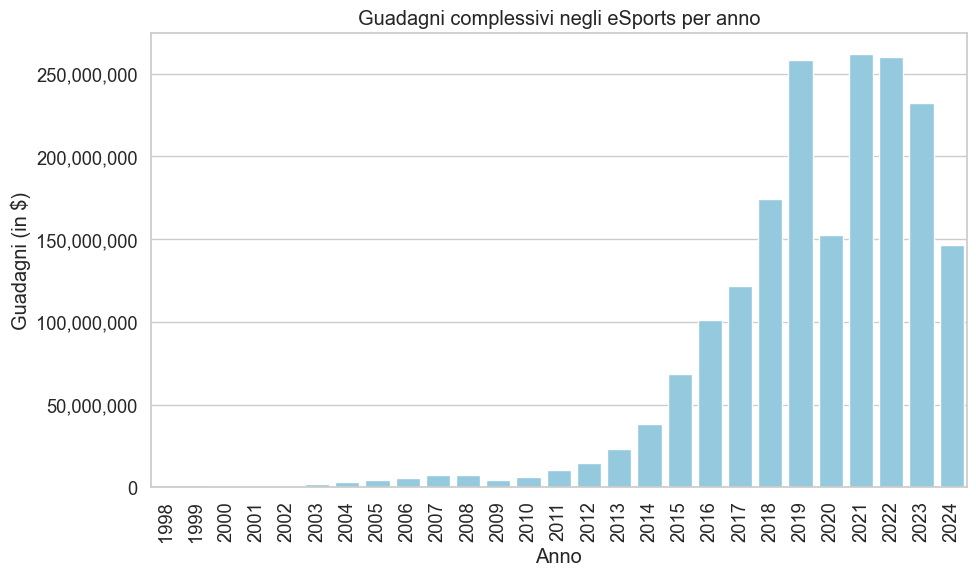

In [5]:
df_Historical["Data"] = pd.to_datetime(df_Historical["Data"])
df_Historical["Anno"] = df_Historical["Data"].dt.year

guadagni_per_anno = df_Historical.groupby("Anno")["Guadagni"].sum().reset_index()
pd.set_option('display.float_format', '{:.2f}'.format)

tornei_per_anno = df_Historical.groupby("Anno")["Tornei"].sum().reset_index()

riscontro_annuale = guadagni_per_anno.merge(tornei_per_anno, on="Anno")

plt.figure(figsize=(10, 6))
sns.barplot(data=riscontro_annuale, x="Anno", y="Guadagni", color="skyblue")

plt.title("Guadagni complessivi negli eSports per anno")
plt.ylabel("Guadagni (in $)")
plt.xlabel("Anno")

plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

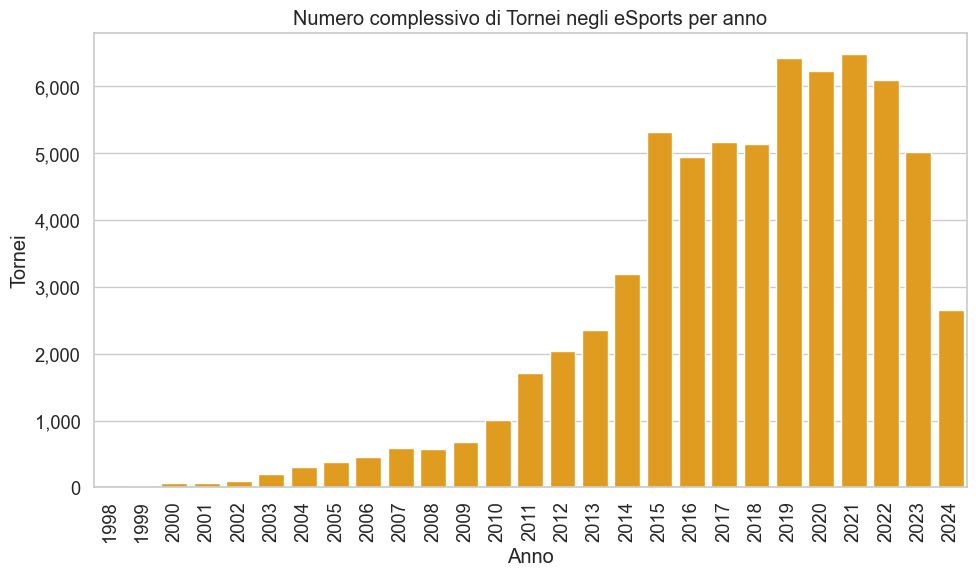

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=riscontro_annuale, x="Anno", y="Tornei", color="orange")

plt.title("Numero complessivo di Tornei negli eSports per anno")
plt.ylabel("Tornei")
plt.xlabel("Anno")

plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Correlazione tra Premi e Tornei

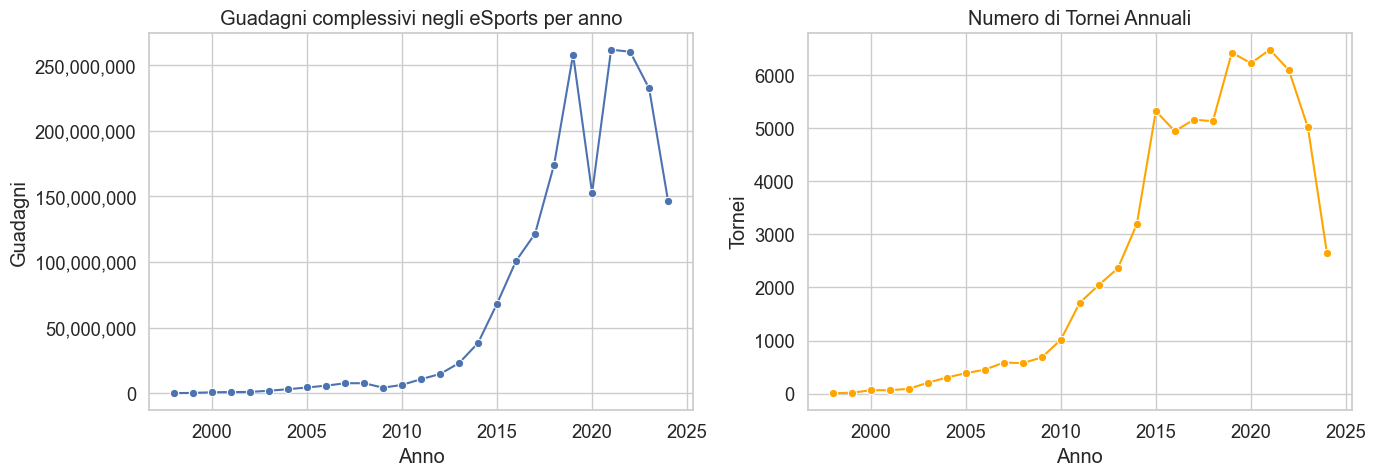

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(data=riscontro_annuale, x="Anno", y="Guadagni", marker="o", ax=axs[0])
axs[0].set_title("Guadagni complessivi negli eSports per anno")
axs[0].set_xlabel("Anno")
axs[0].set_ylabel("Guadagni")
axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(data=riscontro_annuale, x="Anno", y="Tornei", marker="o", color="orange", ax=axs[1])
axs[1].set_title("Numero di Tornei Annuali")
axs[1].set_xlabel("Anno")
axs[1].set_ylabel("Tornei")

plt.grid(True)
plt.tight_layout()

plt.show();

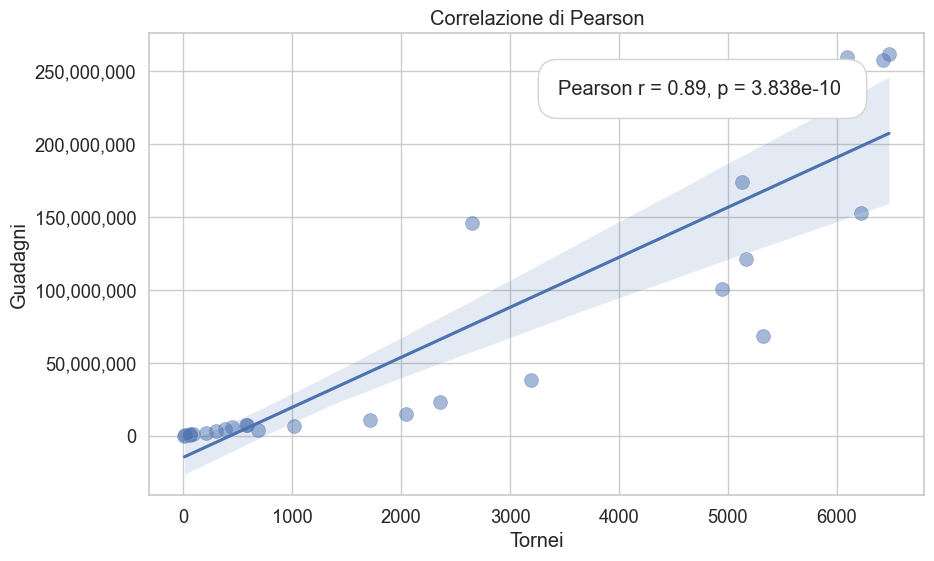

In [8]:
plt.figure(figsize = (10, 6) )
plt.title("Correlazione di Pearson")
sns.regplot(data=riscontro_annuale, x="Tornei", y="Guadagni", scatter_kws={'s': 100,'alpha': 0.5,'linewidths': 0.5})
corr, p = pearsonr(riscontro_annuale['Guadagni'], riscontro_annuale['Tornei'])
plt.annotate(f'Pearson r = {corr:.2f}, p = {p:.3e} ', xy=(0.9, 0.9), xycoords='axes fraction',
              ha='right', va='top', bbox=dict(boxstyle='round,pad=1', fc='white', ec='lightgrey'));
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

## Ma quindi gli eSports stanno sparendo?

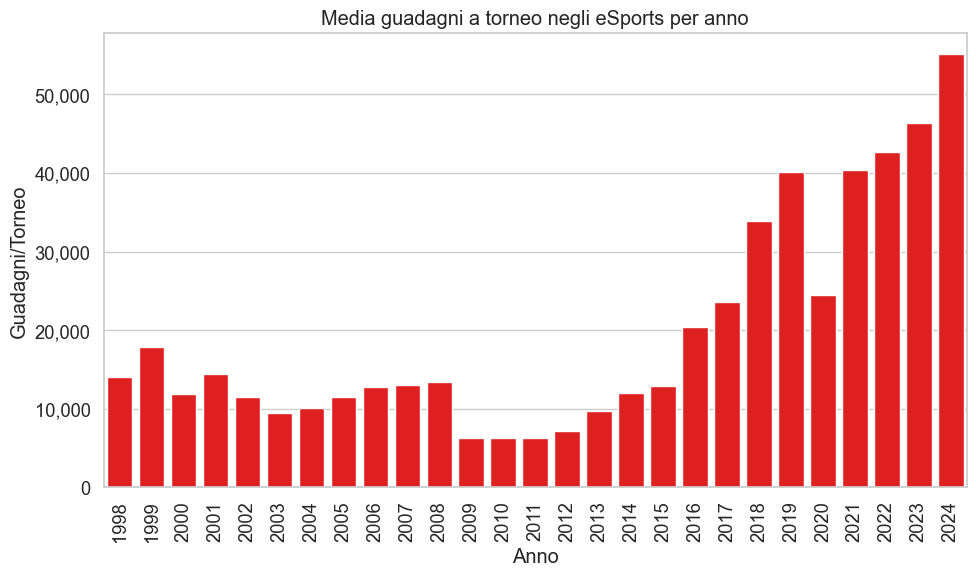

In [9]:
riscontro_annuale["Guadagni/Torneo"] = (riscontro_annuale["Guadagni"] / riscontro_annuale["Tornei"]).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(data=riscontro_annuale, x="Anno", y="Guadagni/Torneo", color="red")

plt.title("Media guadagni a torneo negli eSports per anno")
plt.ylabel("Guadagni/Torneo")
plt.xlabel("Anno")

plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Ma quali sono i Generi con più rappresentanti?

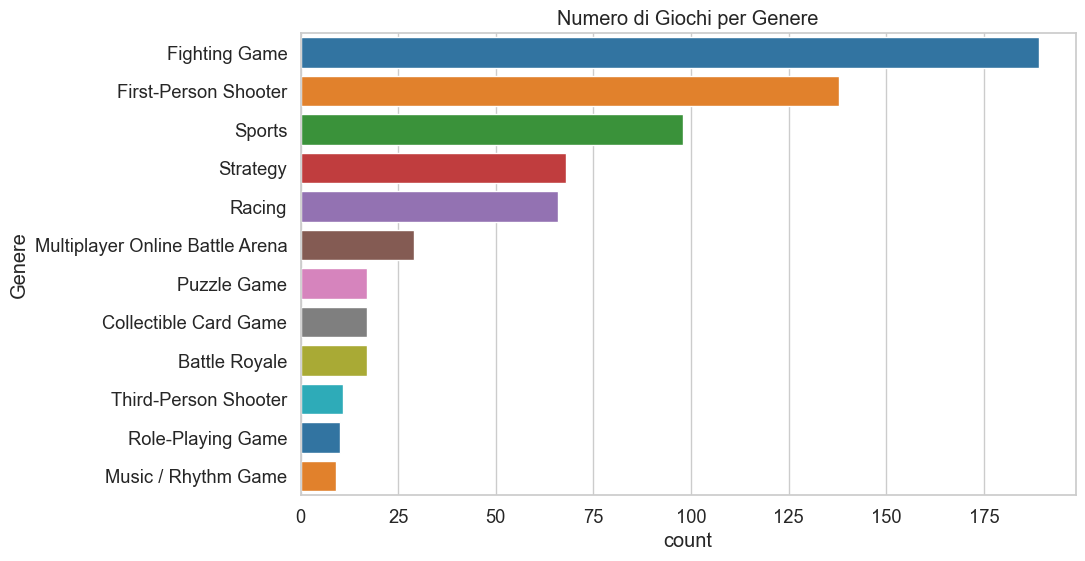

In [10]:
ordine = df_General["Genere"].value_counts().index 
palette = sns.color_palette("tab10", n_colors=len(ordine))
color_mapping = dict(zip(ordine, palette))

plt.figure(figsize = (10, 6) )
plt.title("Numero di Giochi per Genere")
sns.countplot(data=df_General, y="Genere", order=ordine, hue="Genere", legend=False, palette=color_mapping);

## Invece il Genere più remunerativo?

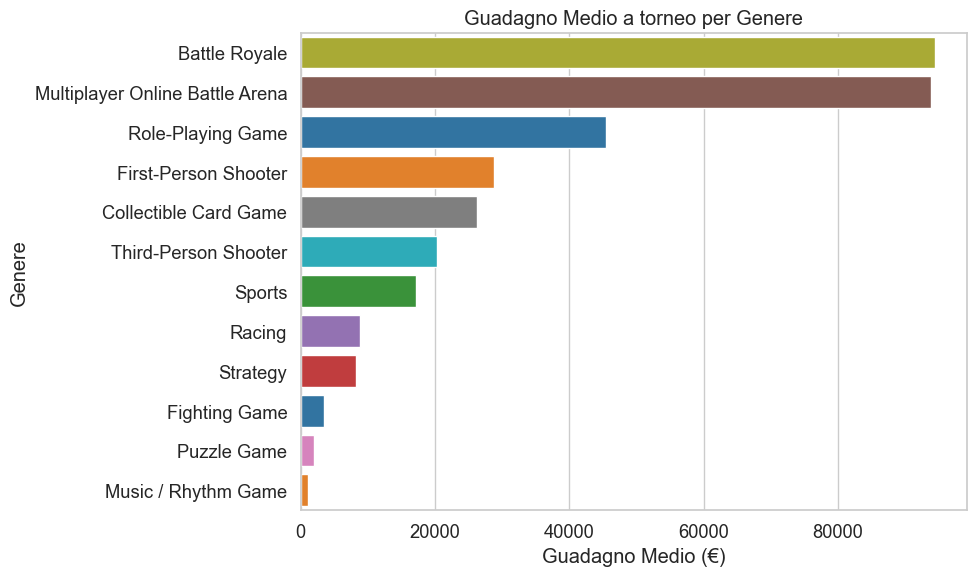

In [11]:
media_per_genere = df_General.groupby("Genere").agg({
    "Guadagni Totali": "sum",
    "Tornei Totali": "sum"
})

# Calcolo del guadagno medio per torneo
media_per_genere["Guadagno medio per torneo"] = media_per_genere["Guadagni Totali"] / media_per_genere["Tornei Totali"]
media_per_genere = media_per_genere.sort_values("Guadagno medio per torneo", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=media_per_genere, x="Guadagno medio per torneo", y="Genere" , hue="Genere", palette=color_mapping)

plt.title("Guadagno Medio a torneo per Genere")
plt.xlabel("Guadagno Medio (€)")
plt.ylabel("Genere")

plt.tight_layout()
plt.show()


## Conclusioni

- Crescita esponenziale 
- Generi dominanti
- Guadagni a singolo torneo in continuo aumento